<a href="https://colab.research.google.com/github/dakuamoah/DAA_ML/blob/main/C_N_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!!pip install rdkit-pypi==2023.3.1b1

['Collecting rdkit-pypi==2023.3.1b1',
 '  Downloading rdkit_pypi-2023.3.1b1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.9 kB)',
 'Requirement already satisfied: numpy in /usr/local/lib/python3.11/dist-packages (from rdkit-pypi==2023.3.1b1) (1.26.4)',
 'Requirement already satisfied: Pillow in /usr/local/lib/python3.11/dist-packages (from rdkit-pypi==2023.3.1b1) (11.1.0)',
 'Downloading rdkit_pypi-2023.3.1b1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (29.7 MB)',
 '\x1b[?25l   \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.0/29.7 MB\x1b \x1b?\x1b eta \x1b-:--:--\x1b',
 '\x1b[2K   \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.2/29.7 MB\x1b \x1b4.9 MB/s\x1b eta \x1b0:00:07\x1b',
 '\x1b[2K   \x1b━\x1b\x1b╺\x1b\x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b1.0/29.7 MB\x1b \x1b16.7 MB/s\x1b eta \x1b0:00:02\x1b',
 '\x1b[2K   \x1b━━\x1b\x1b╸\x1b\x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b2.1/29.7 MB\x1b \x1b24.6 MB/s\x1b eta 

In [ ]:
!pip install lightgbm
!pip install dask[dataframe]

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
#-------------------------------------------------------
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.DataStructs.cDataStructs import ExplicitBitVect
from rdkit.Avalon import pyAvalonTools
from rdkit.Chem import PandasTools
from rdkit.Chem import rdMolDescriptors
from tqdm import tqdm

from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import DataStructs

#--------------------------------------------------------
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import time
from sklearn.model_selection import ShuffleSplit, cross_validate,train_test_split
#--------------------------------------------------------
from lightgbm import LGBMRegressor

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 5.4 MB/s eta 0:00:00


Failed to find the pandas get_adjustment() function to patch
Failed to patch pandas - PandasTools will have limited functionality


In [ ]:
#Read Data Frame
data = pd.read_csv('Buchwald_yield_data.csv')
data

,Ligand,Additive,Base,Aryl halide,Output
0,CC(C)C(C=C(C(C)C)C=C1C(C)C)=C1C2=C(P([C@@]3(C[...,CC1=CC(C)=NO1,CN(C)P(N(C)C)(N(C)C)=NP(N(C)C)(N(C)C)=NCC,ClC1=NC=CC=C1,70.410458
1,CC(C)C(C=C(C(C)C)C=C1C(C)C)=C1C2=C(P([C@@]3(C[...,O=C(OC)C1=CC=NO1,CN(C)P(N(C)C)(N(C)C)=NP(N(C)C)(N(C)C)=NCC,BrC1=NC=CC=C1,11.064457
2,CC(C)C(C=C(C(C)C)C=C1C(C)C)=C1C2=C(P(C3CCCCC3)...,O=C(OC)C1=CC=NO1,CN(C)P(N(C)C)(N(C)C)=NP(N(C)C)(N(C)C)=NCC,IC1=CC=C(CC)C=C1,10.223550
3,CC(C)C(C=C(C(C)C)C=C1C(C)C)=C1C2=C(P(C(C)(C)C)...,CCOC(C1=CON=C1)=O,CN1CCCN2C1=NCCC2,ClC1=CC=C(C(F)(F)F)C=C1,20.083383
4,CC(C)C(C=C(C(C)C)C=C1C(C)C)=C1C2=C(P([C@@]3(C[...,CC1=CC(C)=NO1,CN1CCCN2C1=NCCC2,ClC1=CC=C(OC)C=C1,0.492663
...,...,...,...,...,...
3950,CC(C)C(C=C(C(C)C)C=C1C(C)C)=C1C2=C(P(C3CCCCC3)...,C1(C2=CC=CC=C2)=CON=C1,CN(C)P(N(C)C)(N(C)C)=NP(N(C)C)(N(C)C)=NCC,BrC1=CC=C(OC)C=C1,4.344677
3951,CC(C)C(C=C(C(C)C)C=C1C(C)C)=C1C2=C(P(C(C)(C)C)...,CC1=CC(N2C=CC=C2)=NO1,CN1CCCN2C1=NCCC2,BrC1=CC=C(OC)C=C1,47.156275
3952,CC(C)C(C=C(C(C)C)C=C1C(C)C)=C1C2=C(P(C(C)(C)C)...,CCOC(C1=CON=C1)=O,CC(C)(C)/N=C(N(C)C)/N(C)C,ClC1=CC=C(C(F)(F)F)C=C1,0.701552
3953,CC(C)C(C=C(C(C)C)C=C1C(C)C)=C1C2=C(P([C@@]3(C[...,C1(N(CC2=CC=CC=C2)CC3=CC=CC=C3)=CC=NO1,CN(C)P(N(C)C)(N(C)C)=NP(N(C)C)(N(C)C)=NCC,ClC1=CC=C(C(F)(F)F)C=C1,15.561565


In [ ]:
#We calculate fingerprints of Ligands, Base, additive and arylhalides then we concatenate them

In [ ]:

def Calculate_Avfps(data,nBits):

    # Store fingerprints using empty lists
    Avalon_fpts = []

    mols = [Chem.MolFromSmiles(x) for x in data if x is not None]
    for mol in tqdm(mols):


        #=============================
        # calculate Avalon fingerprints
        #=============================
        avfpts = pyAvalonTools.GetAvalonFP(mol, nBits=nBits)
        Avalon_fpts.append(avfpts)


    #=================================
    # return the lists as numpy array
    #=================================
    return np.array(Avalon_fpts)

In [ ]:
ligand_fpts =  Calculate_Avfps(data['Ligand'], 2048)
additive_fpts =  Calculate_Avfps(data['Additive'], 1024)
base_fpts =  Calculate_Avfps(data['Base'], 1024)
Aryl_fpts =  Calculate_Avfps(data['Aryl halide'], 1024)

100%|██████████| 3955/3955 [00:01<00:00, 2944.46it/s]


In [ ]:
#Concatenate fingerprints of starting materials
# the order of the concatenation would not matter

concatenated = np.concatenate((ligand_fpts,additive_fpts,base_fpts,Aryl_fpts),axis=1)
concatenated.shape

(3955, 5120)

In [ ]:
# Now let us put this into a data frame

concatenated_df = pd.DataFrame(concatenated,columns=['Col_A_{}'.format(i + 1) for i in range(concatenated.shape[1])])
concatenated_df

,Col_A_1,Col_A_2,Col_A_3,Col_A_4,Col_A_5,Col_A_6,Col_A_7,Col_A_8,Col_A_9,Col_A_10,...,Col_A_5111,Col_A_5112,Col_A_5113,Col_A_5114,Col_A_5115,Col_A_5116,Col_A_5117,Col_A_5118,Col_A_5119,Col_A_5120
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3950,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3951,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3952,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3953,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Lets use light LGBM to train our model

In [ ]:
#Instantiate the models

lgbm_av = LGBMRegressor(n_estimators=800, random_state=42)
model_rf = RandomForestRegressor(random_state=42)

In [ ]:
# 10 fold cross validation

# start time
start = time.time()

# from Sklearn -shuffle and split data
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)

scoring = ['r2','neg_root_mean_squared_error']

scores_CN = cross_validate(lgbm_av, concatenated_df,  data.Output, scoring=scoring, cv=cv)


print(scores_CN)
# wait for 3 seconds

time.sleep(3)
# get the end time
end = time.time()

# get the execution time
total_time = end - start
print('Total time required:', round(total_time/60, 2), 'min')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007645 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1808
[LightGBM] [Info] Number of data points in the train set: 2768, number of used features: 904
[LightGBM] [Info] Start training from score 33.142928
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012962 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1808
[LightGBM] [Info] Number of data points in the train set: 2768, number of used features: 904
[LightGBM] [Info] Start training from score 33.110559
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007548 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

In [ ]:
# Lets access the r2 values
scores_CN['test_r2']

array([0.9539233 , 0.94593933, 0.94569323, 0.95567864, 0.9544228 ,
       0.95253277, 0.94532573, 0.95206717, 0.94722408, 0.94938093])

In [ ]:
# Mean values of tenfold cross-validation of R^2 and RMSE
#Using lightGBM

print("R^2 :", round(np.mean(scores_CN['test_r2']), 2))
print("RMSE :", round(np.mean(-scores_CN['test_neg_root_mean_squared_error']), 2))

R^2 : 0.95
RMSE : 6.06


In [ ]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(concatenated_df, data.Output,
                                                    test_size=0.3, shuffle=True,random_state=42)



In [ ]:
#Model training and Prediction
#All the features are used here

model_all_features = LGBMRegressor(n_estimators=800, random_state=42)
model_all_features.fit(X_train, y_train)
predict_yield_all_features = model_all_features.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007815 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1808
[LightGBM] [Info] Number of data points in the train set: 2768, number of used features: 904
[LightGBM] [Info] Start training from score 33.142928


In [ ]:
# Lets calculate RMSE and coefficient of determination R2

RMSE_all =np.sqrt(mean_squared_error(y_test, predict_yield_all_features))
R2_all = r2_score(y_test, predict_yield_all_features)

print('RMSE:', round(RMSE_all, 2))
print('R2:', round(R2_all, 2))


RMSE: 5.91
R2: 0.95


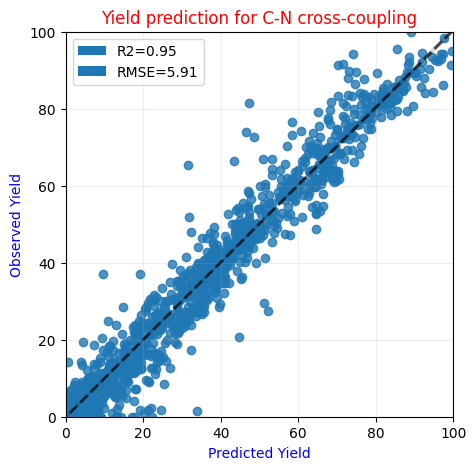

In [ ]:
# Lets plot our model

# Plot predicted and observed yields
plt.figure(figsize=(5,5))
sns.regplot(x=predict_yield_all_features, y=y_test,line_kws={"lw":2,'ls':'--','color':'black',"alpha":0.7})
plt.xlabel('Predicted Yield', color='blue')
plt.ylabel('Observed Yield', color ='blue')
plt.xlim(0,100)
plt.ylim(0,100)
plt.title("Yield prediction for C-N cross-coupling", color='red')
plt.grid(alpha=0.2)
R2_all = mpatches.Patch(label="R2={:04.2f}".format(R2_all))
RMSE_all = mpatches.Patch(label="RMSE={:4.2f}".format(RMSE_all))
plt.legend(handles=[R2_all, RMSE_all])


# 🔎 Feature Selection & Correlation to Yield

This section was added to:
- compute **feature importance** with LightGBM,
- show the **Top 20 most important features** in a table,
- **retrain** a model using **only those Top 20 features** and report metrics,
- compute **correlations** of features with `yield`,
- visualize a **correlation heatmap** for the Top 20 correlated features.


In [ ]:

# === Imports for analysis, modeling, and plotting ===
# (Wrapped in try/except so it works even if imported earlier in the notebook)
try:
    import pandas as pd
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
    from lightgbm import LGBMRegressor
    import matplotlib.pyplot as plt
except Exception as e:
    raise RuntimeError(f"Required packages missing: {e}")


In [ ]:

# === Sanity checks ===
# Expect a DataFrame called `data` already loaded in prior cells.
# It must contain a target column named 'yield' and numeric feature columns.

# 1) Verify `data` exists
if 'data' not in globals():
    raise NameError("Expected a DataFrame named `data` in memory (created earlier in the notebook).")

# 2) Ensure 'yield' column exists
if 'yield' not in data.columns:
    raise KeyError("Column 'yield' not found in `data`. Please ensure your dataset has a 'yield' column.")

# 3) Keep only numeric columns for modeling/correlation
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
if 'yield' not in numeric_cols:
    raise ValueError("'yield' column must be numeric for regression.")

# OPTIONAL: Drop obviously constant columns (no variance)
nunique = data[numeric_cols].nunique()
constant_cols = nunique[nunique <= 1].index.tolist()
if constant_cols:
    print(f"Dropping {len(constant_cols)} constant columns (no variance).")
    data = data.drop(columns=constant_cols)

print(f"Data shape after checks: {data.shape}")


In [ ]:

# === Feature importance with LightGBM ===
# Split features/target
X = data.drop(columns=['yield'])
y = data['yield']

# Train/test split (fixed random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a simple LightGBM regressor (defaults are good starting points)
lgb = LGBMRegressor(random_state=42)
lgb.fit(X_train, y_train)

# Compute feature importances and sort descending
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': lgb.feature_importances_
}).sort_values(by='importance', ascending=False).reset_index(drop=True)

# Display the Top 20 most important features
top20_importance = feature_importance.head(20).copy()
display(top20_importance)

# Save for later reference (optional)
top20_importance.to_csv('top20_feature_importance.csv', index=False)
print("Saved Top-20 feature importance to top20_feature_importance.csv")


In [ ]:

# === Retrain a model using only the Top 20 features ===
top20_feats = top20_importance['feature'].tolist()

# Subset train/test to the Top 20 features
X_train_top20 = X_train[top20_feats]
X_test_top20  = X_test[top20_feats]

lgb_top20 = LGBMRegressor(random_state=42)
lgb_top20.fit(X_train_top20, y_train)

# Evaluate the Top-20 model
y_pred_top20 = lgb_top20.predict(X_test_top20)

r2  = r2_score(y_test, y_pred_top20)
mae = mean_absolute_error(y_test, y_pred_top20)
rmse = mean_squared_error(y_test, y_pred_top20, squared=False)

print(f"""
Performance using only Top-20 features:
  R2   : {r2:.4f}
  MAE  : {mae:.4f}
  RMSE : {rmse:.4f}
""".strip())


In [ ]:

# === Correlations of features to yield (Pearson) ===
# We compute correlation for numeric columns only.
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
corr_series = data[numeric_cols].corr()['yield'].dropna().sort_values(key=lambda s: s.abs(), ascending=False)

# Show Top 20 most correlated (by absolute value)
top20_corr = corr_series.head(20)
display(top20_corr.to_frame(name='pearson_corr_to_yield'))

# === Plot heatmap for these Top 20 correlated features + yield ===
# Using matplotlib directly (no seaborn), to keep dependencies minimal.
subset_cols = top20_corr.index.tolist() + ['yield']
corr_mat = data[subset_cols].corr().values
labels = subset_cols

plt.figure(figsize=(8, 6))
im = plt.imshow(corr_mat, interpolation='nearest')
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=90)
plt.yticks(ticks=range(len(labels)), labels=labels)
plt.title('Correlation heatmap (Top 20 by |corr with yield|)')
plt.tight_layout()
plt.show()
